In [35]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from pandas.plotting import parallel_coordinates
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn import svm
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import learning_curve

In [206]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_timing_curves(estimators, X, y,title= "Validation Curve", axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.05, 1.0, 8), scoring = "balanced_accuracy", random_state =1):

#     if axes is None:
#         _, axes = plt.subplots(1, 3, figsize=(20, 5))

#     axes[0].set_title(title)
#     if ylim is not None:
#         axes[0].set_ylim(*ylim)
#     axes[0].set_xlabel("Training examples")
#     axes[0].set_ylabel("Score")
#     axes[0].grid()
#     axes[1].grid()
#     axes[2].grid()


    ax = plt.subplot()
    ax.grid()
    
    for estimator, name in estimators:
        print(name)
        train_sizes, train_scores, test_scores, fit_times, _ = \
            learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                           train_sizes=train_sizes,
                           return_times=True, random_state= random_state, scoring=scoring)
        train_scores_mean = np.mean(train_scores, axis=1)
        train_scores_std = np.std(train_scores, axis=1)
        test_scores_mean = np.mean(test_scores, axis=1)
        test_scores_std = np.std(test_scores, axis=1)
        fit_times_mean = np.mean(fit_times, axis=1)
        fit_times_std = np.std(fit_times, axis=1)

        # Plot learning curve
        
#         axes[0].plot(train_sizes, train_scores_mean, 'o-',
#                      label=name)
#         axes[0].legend(loc="best")

        # Plot n_samples vs fit_times
        
        ax.semilogy(train_sizes, fit_times_mean, 'o-', label = name)
        ax.set_xlabel("Training examples")
        ax.set_ylabel("Fit times (s)")
        ax.set_title(title,fontdict={'fontsize': 15, 'fontweight': 'heavy'} )
        ax.legend(loc="best")

        # Plot fit_time vs score
        
#         axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
#         axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
#                              test_scores_mean + test_scores_std, alpha=0.1)
#         axes[2].set_xlabel("fit_times")
#         axes[2].set_ylabel("Score")
#         axes[2].set_title("Performance of the model")

    plt.grid(True)
    return plt

In [141]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, X, y,title= "Validation Curve", axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.05, 1.0, 8), scoring = "balanced_accuracy", random_state =1):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, axes = plt.subplots(1, 3, figsize=(20, 5))

    axes[0].set_title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    axes[0].set_xlabel("Training examples")
    axes[0].set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y,
                       train_sizes=train_sizes, scoring = scoring,
                       return_times=True, random_state = random_state, cv=cv, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    print("Train Score Mean " + str(train_scores_mean[-1]))
    print("Test Score Mean " + str(test_scores_mean[-1]))

    # Plot learning curve
    axes[0].grid()
    axes[0].fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    axes[0].fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    axes[0].plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    axes[0].plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    axes[0].legend(loc="best")

    # Plot n_samples vs fit_times
    axes[1].grid()
    axes[1].plot(train_sizes, fit_times_mean, 'o-')
    axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
                         fit_times_mean + fit_times_std, alpha=0.1)
    axes[1].set_xlabel("Training examples")
    axes[1].set_ylabel("fit_times")
    axes[1].set_title("Scalability of the model")

    # Plot fit_time vs score
    axes[2].grid()
    axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
    axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1)
    axes[2].set_xlabel("fit_times")
    axes[2].set_ylabel("Score")
    axes[2].set_title("Performance of the model")

    return plt


In [154]:
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_learning_curve.html

import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.model_selection import learning_curve
from sklearn.model_selection import ShuffleSplit


def plot_learning_curve(estimator, X, y,title= "Validation Curve", axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.05, 1.0, 8), scoring = "balanced_accuracy", random_state =1):
    """
    Generate 3 plots: the test and training learning curve, the training
    samples vs fit times curve, the fit times vs score curve.

    Parameters
    ----------
    estimator : estimator instance
        An estimator instance implementing `fit` and `predict` methods which
        will be cloned for each validation.

    title : str
        Title for the chart.

    X : array-like of shape (n_samples, n_features)
        Training vector, where ``n_samples`` is the number of samples and
        ``n_features`` is the number of features.

    y : array-like of shape (n_samples) or (n_samples, n_features)
        Target relative to ``X`` for classification or regression;
        None for unsupervised learning.

    axes : array-like of shape (3,), default=None
        Axes to use for plotting the curves.

    ylim : tuple of shape (2,), default=None
        Defines minimum and maximum y-values plotted, e.g. (ymin, ymax).

    cv : int, cross-validation generator or an iterable, default=None
        Determines the cross-validation splitting strategy.
        Possible inputs for cv are:

          - None, to use the default 5-fold cross-validation,
          - integer, to specify the number of folds.
          - :term:`CV splitter`,
          - An iterable yielding (train, test) splits as arrays of indices.

        For integer/None inputs, if ``y`` is binary or multiclass,
        :class:`StratifiedKFold` used. If the estimator is not a classifier
        or if ``y`` is neither binary nor multiclass, :class:`KFold` is used.

        Refer :ref:`User Guide <cross_validation>` for the various
        cross-validators that can be used here.

    n_jobs : int or None, default=None
        Number of jobs to run in parallel.
        ``None`` means 1 unless in a :obj:`joblib.parallel_backend` context.
        ``-1`` means using all processors. See :term:`Glossary <n_jobs>`
        for more details.

    train_sizes : array-like of shape (n_ticks,)
        Relative or absolute numbers of training examples that will be used to
        generate the learning curve. If the ``dtype`` is float, it is regarded
        as a fraction of the maximum size of the training set (that is
        determined by the selected validation method), i.e. it has to be within
        (0, 1]. Otherwise it is interpreted as absolute sizes of the training
        sets. Note that for classification the number of samples usually have
        to be big enough to contain at least one sample from each class.
        (default: np.linspace(0.1, 1.0, 5))
    """
    if axes is None:
        _, ax = plt.subplots( figsize=(6, 5))

    ax.set_title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})
    if ylim is not None:
        axes[0].set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y,
                       train_sizes=train_sizes, scoring = scoring,
                       return_times=True, random_state = random_state, cv=cv, n_jobs=-1)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    fit_times_mean = np.mean(fit_times, axis=1)
    fit_times_std = np.std(fit_times, axis=1)
    
    print("Train Score Mean " + str(train_scores_mean[-1]))
    print("Test Score Mean " + str(test_scores_mean[-1]))

    # Plot learning curve
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                         train_scores_mean + train_scores_std, alpha=0.1,
                         color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                         test_scores_mean + test_scores_std, alpha=0.1,
                         color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
                 label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
                 label="Cross-validation score")
    ax.legend(loc="best")

#     # Plot n_samples vs fit_times
#     axes[1].grid()
#     axes[1].plot(train_sizes, fit_times_mean, 'o-')
#     axes[1].fill_between(train_sizes, fit_times_mean - fit_times_std,
#                          fit_times_mean + fit_times_std, alpha=0.1)
#     axes[1].set_xlabel("Training examples")
#     axes[1].set_ylabel("fit_times")
#     axes[1].set_title("Scalability of the model")

#     # Plot fit_time vs score
#     axes[2].grid()
#     axes[2].plot(fit_times_mean, test_scores_mean, 'o-')
#     axes[2].fill_between(fit_times_mean, test_scores_mean - test_scores_std,
#                          test_scores_mean + test_scores_std, alpha=0.1)
#     axes[2].set_xlabel("fit_times")
#     axes[2].set_ylabel("Score")
#     axes[2].set_title("Performance of the model")

    return plt


In [134]:
# https://scikit-learn.org/stable/modules/model_evaluation.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

def plot_validation_curve(estimator, X, y, param_name,title= "Validation Curve", axes=None, ylim=None, cv=None,
                        n_jobs=-1, param_range=np.linspace(.1, 1.0, 5), scoring = "balanced_accuracy", random_state = 1):

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range, scoring=scoring, cv = cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.plot(param_range, train_scores_mean, label="Training score", color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="g")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
    array = sorted(zip(param_range, test_scores_mean), key = lambda x:x[1], reverse = True)
    return array

In [135]:
# https://scikit-learn.org/stable/modules/model_evaluation.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve

digits = load_digits()
X, y = digits.data, digits.target

def plot_validation_curve_log(estimator, X, y, param_name,title= "Validation Curve", axes=None, ylim=None, cv=None,
                        n_jobs=-1, param_range=np.linspace(.1, 1.0, 5), scoring = "balanced_accuracy", random_state = 1):

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range, scoring=scoring, cv = cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.semilogx(param_range, train_scores_mean, label="Training score", color="r")
    plt.fill_between(param_range, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.2, color="r")
    plt.semilogx(param_range, test_scores_mean, label="Cross-validation score",
                 color="g")
    plt.fill_between(param_range, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.2, color="g")
    plt.legend(loc="best")
    plt.grid()
    plt.show()
    array = list(zip(param_range, test_scores_mean))
    return array

In [136]:
# https://scikit-learn.org/stable/modules/model_evaluation.html

import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits
from sklearn.svm import SVC
from sklearn.model_selection import validation_curve
from sklearn.model_selection import StratifiedShuffleSplit

digits = load_digits()
X, y = digits.data, digits.target
#StratifiedShuffleSplit(n_splits = 1,test_size=0.2, train_size = 0.8, random_state = 1)
def plot_validation_curve_nn(estimator, X, y, param_name,title= "Validation Curve", axes=None, ylim=None,
                             cv=None,
                        n_jobs=-1, param_range=np.linspace(.1, 1.0, 5), scoring = "balanced_accuracy", random_state = 1):

    train_scores, test_scores = validation_curve(
        estimator, X, y, param_name=param_name, param_range=param_range, scoring=scoring, cv = cv)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.title(title, fontdict={'fontsize': 15, 'fontweight': 'heavy'})
    plt.xlabel(param_name)
    plt.ylabel("Score")
    plt.plot(param_range, train_scores_mean, label="Training score", color="r")

    plt.plot(param_range, test_scores_mean, label="Cross-validation score",
                 color="g")

    plt.legend(loc="best")
    plt.grid()
    plt.show()
    array = sorted(zip(param_range, test_scores_mean), key = lambda x:x[1], reverse = True)
    return array

In [110]:
data_red = pd.read_csv("winequality-red.csv", delimiter = ";")
data_red["isRed"] = 1
data_red["isWhite"] = 0
data_white = pd.read_csv("winequality-white.csv", delimiter = ";")
data_white["isRed"] = 0
data_white["isWhite"] = 1
data = pd.concat([data_red, data_white], axis = 0)

#data = data_red
data.groupby('quality').size()


quality
3      30
4     216
5    2138
6    2836
7    1079
8     193
9       5
dtype: int64

Text(0.5, 1.0, 'Fig 1.1 - Distribution of Wine Quality')

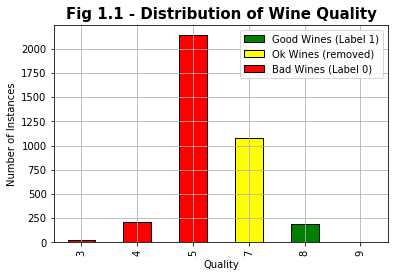

In [131]:
ax = pd.Series(data.groupby('quality').size()).plot(kind="bar", color=['red', 'red', 'red', 'yellow','green', 'green', 'green'],
                                                    edgecolor="black",
                                                   )

plt.ylabel("Number of Instances")
plt.xlabel("Quality")

lgd = ax.legend(loc='upper right')

def add_patch(legend):
    from matplotlib.patches import Patch
    ax = legend.axes

    handles, labels = [],[]
    handles.append(Patch(facecolor='Green', edgecolor='k'))
    labels.append("Good Wines (Label 1)")
    handles.append(Patch(facecolor='yellow', edgecolor='k'))
    labels.append("Ok Wines (removed)")
    handles.append(Patch(facecolor='red', edgecolor='k'))
    labels.append("Bad Wines (Label 0)")

    legend._legend_box = "test"
    legend._init_legend_box(handles, labels)
    legend._set_loc(legend._loc)
    legend.set_title(legend.get_title().get_text())


add_patch(lgd)
plt.grid()

plt.title('Fig 1.1 - Distribution of Wine Quality', fontdict={'fontsize': 15, 'fontweight': 'heavy'})


AttributeError: type object 'Series' has no attribute 'from_array'

In [112]:
data["label"] = data["quality"]
data = data[data.quality != 6]
data.label[data.quality == 3] = 0
data.label[data.quality == 4] = 0
data.label[data.quality == 5] = 0
data.label[data.quality == 7] = 1
data.label[data.quality == 8] = 1
data.label[data.quality == 9] = 1
print(data.groupby('quality').size())

data.head()

quality
3      30
4     216
5    2138
7    1079
8     193
9       5
dtype: int64


/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:7: Se

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,isRed,isWhite,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,0,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1,0,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1,0,0
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,1,0,0


In [34]:
pd.Series(data.groupby('quality').size()).plot(kind="bar")
data = data.drop(columns =["quality"], color=['black', 'red', 'green', 'blue', 'cyan'])

KeyError: 'quality'

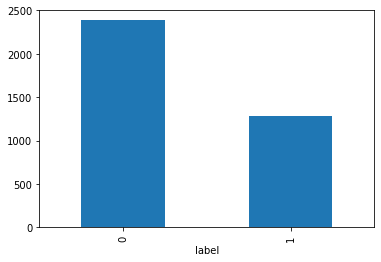

In [113]:
pd.Series(data.groupby('label').size()).plot(kind="bar")

In [7]:
abs(data.corr()["label"]).sort_values(ascending =False)

label                   1.000000
alcohol                 0.601221
density                 0.438502
volatile acidity        0.295733
chlorides               0.249355
isWhite                 0.153977
isRed                   0.153977
citric acid             0.098490
fixed acidity           0.089577
residual sugar          0.083844
total sulfur dioxide    0.078022
sulphates               0.054568
free sulfur dioxide     0.040764
pH                      0.038957
Name: label, dtype: float64

Text(0.5, 1.02, 'Fig. 1.2a - Wine Quality')

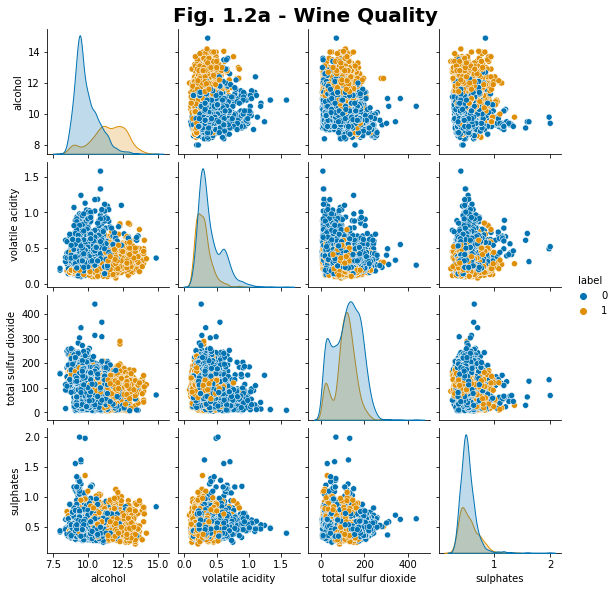

In [130]:
g= sns.pairplot(data[["label","alcohol", "volatile acidity", "total sulfur dioxide", "sulphates"]], hue="label", height = 2, palette = 'colorblind')
g.fig.suptitle("Fig. 1.2a - Wine Quality", y = 1.02, fontsize=20, fontweight ='heavy')


In [12]:
X = data.iloc[:,:-1]
y = data['label']
X_train, X_test, y_train, y_test = \
    train_test_split(X, y,
                     test_size=0.2, stratify = data['label'], random_state = 1)
print(len(X_train),' samples in training data\n',
      len(X_test),' samples in test data\n', )

2928  samples in training data
 733  samples in test data



# Standardization

In [13]:
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [14]:
X_train_original = X_train
X_test_original = X_test
X_train = X_train_scaled
X_test = X_test_scaled

# Decision Tree

In [84]:
#https://stackoverflow.com/questions/31161637/grid-search-cross-validation-in-sklearn

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

def dtree_grid_search(X,y, verbose = 0):
    #create a dictionary of all values we want to test
    param_grid = { 'criterion':['gini', 'entropy'],'max_depth': np.arange(1, 40)}
    # decision tree model
    dtree_model=DecisionTreeClassifier(random_state = 1)
    #use gridsearch to test all values
    dtree_gscv = GridSearchCV(dtree_model, param_grid, verbose = verbose, scoring="balanced_accuracy")
    #fit model to data
    dtree_gscv.fit(X, y)
    if verbose:
        print(dtree_gscv.cv_results_)
    
    return dtree_gscv

In [85]:
results = dtree_grid_search(X_train, y_train)
results

GridSearchCV(estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])},
             scoring='balanced_accuracy')

In [86]:
results.best_params_


{'criterion': 'gini', 'max_depth': 11}

In [87]:
results.cv_results_

{'mean_fit_time': array([0.00462852, 0.00399909, 0.00491357, 0.00518432, 0.00546446,
        0.00616622, 0.00748262, 0.00858579, 0.00950084, 0.00921783,
        0.00942779, 0.00923676, 0.00944862, 0.00924816, 0.00996513,
        0.00926113, 0.00975151, 0.00932627, 0.00991058, 0.00999088,
        0.00958428, 0.00974612, 0.01036839, 0.01060386, 0.00967135,
        0.00983033, 0.00981932, 0.00981426, 0.00965819, 0.0101368 ,
        0.01074462, 0.00966954, 0.0099184 , 0.00948887, 0.00979486,
        0.01030965, 0.01011057, 0.01014447, 0.01009078, 0.00176024,
        0.00263929, 0.0036293 , 0.00488291, 0.00605564, 0.00717125,
        0.0086412 , 0.00925927, 0.00978866, 0.00928316, 0.00971036,
        0.01000423, 0.00992503, 0.01005359, 0.01017151, 0.01007481,
        0.01074281, 0.01022873, 0.01054497, 0.00969253, 0.00984225,
        0.01005836, 0.00963984, 0.00971785, 0.00951862, 0.00962806,
        0.00981517, 0.00973721, 0.00968714, 0.00963674, 0.00985518,
        0.00943494, 0.00972185,

Train Score Mean 0.9851932652798236
Test Score Mean 0.8534529096177911


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

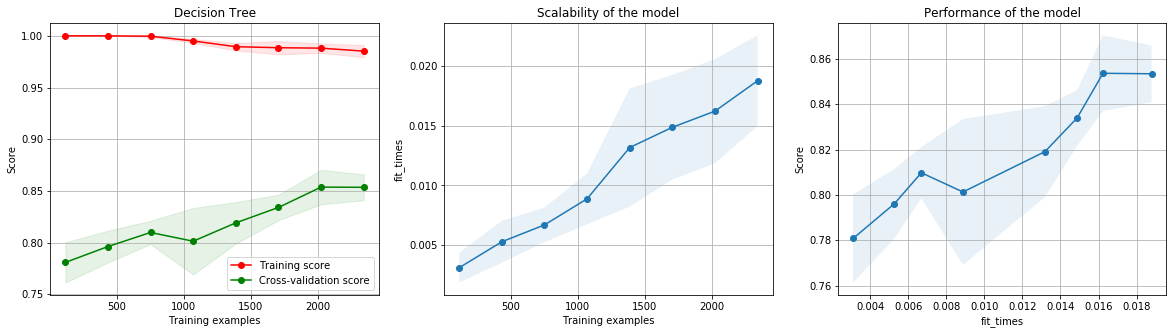

In [88]:
params = results.best_params_
mod_dt = DecisionTreeClassifier(random_state =1)
mod_dt.set_params(**params)
plot_learning_curve(mod_dt, X_train, y_train, "Decision Tree")

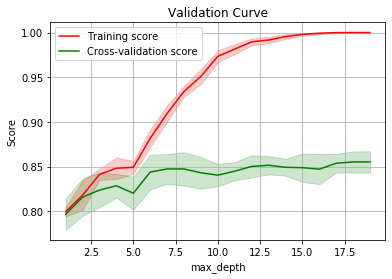

In [59]:
mod_dt = DecisionTreeClassifier(random_state =1, criterion = 'entropy')
perf_array = plot_validation_curve(mod_dt, X_train, y_train, param_name = "max_depth", param_range = np.arange(1,20))

Train Score Mean 0.972685647027468
Test Score Mean 0.8400514547246114


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

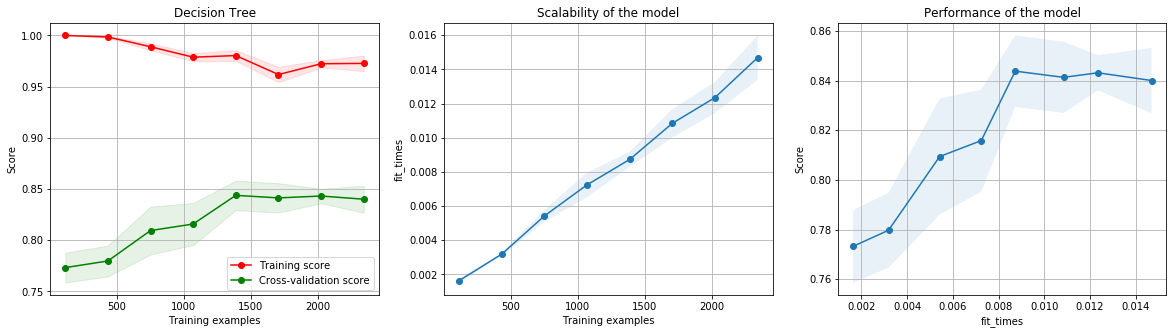

In [60]:
mod_dt = DecisionTreeClassifier(random_state =1, criterion = 'entropy', max_depth = 10)
plot_learning_curve(mod_dt, X_train, y_train, "Decision Tree")

In [61]:
mod_dt.fit(X_train, y_train)
for name, importance in sorted(zip(X_train_original.columns, mod_dt.feature_importances_), key = lambda x:x[1], reverse = True):
    print(name, importance)

alcohol 0.4217822976366335
volatile acidity 0.15178622164621236
residual sugar 0.0815800225728415
total sulfur dioxide 0.07018428190326902
free sulfur dioxide 0.0683750189822885
sulphates 0.06781141743074863
fixed acidity 0.03735276945221175
chlorides 0.035345270226168325
pH 0.03279753987473895
citric acid 0.017650754635311374
density 0.015334405639575987
isRed 0.0
isWhite 0.0


The balanced accuracy of the Decision Tree is 0.770


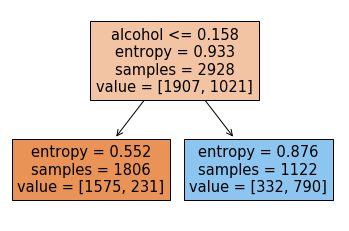

In [62]:
mod_dt = DecisionTreeClassifier(random_state =1, criterion = 'entropy', max_depth = 1)
mod_dt.fit(X_train_scaled, y_train)
plot_tree(mod_dt, feature_names = list(X_train_original.columns), filled = True);
prediction=mod_dt.predict(X_test)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.2568666187248273


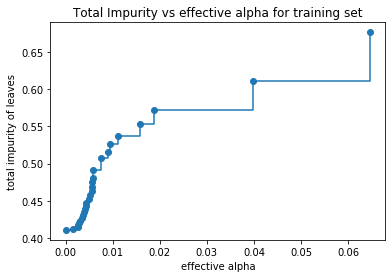

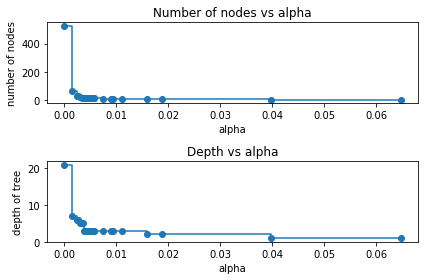

In [63]:
clf = DecisionTreeClassifier(random_state =1, criterion = 'entropy', max_depth = 5)
path = clf.cost_complexity_pruning_path(X_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities
clfs = []
fig, ax = plt.subplots()
ax.plot(ccp_alphas[:-1], impurities[:-1], marker='o', drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(random_state=1, ccp_alpha=ccp_alpha)
    clf.fit(X_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
      clfs[-1].tree_.node_count, ccp_alphas[-1]))
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1)
ax[0].plot(ccp_alphas, node_counts, marker='o', drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker='o', drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

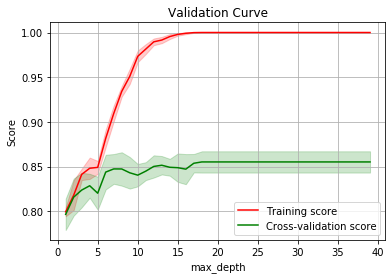

[(18, 0.8553190916289415),
 (19, 0.8553190916289415),
 (20, 0.8553190916289415),
 (21, 0.8553190916289415),
 (22, 0.8553190916289415),
 (23, 0.8553190916289415),
 (24, 0.8553190916289415),
 (25, 0.8553190916289415),
 (26, 0.8553190916289415),
 (27, 0.8553190916289415),
 (28, 0.8553190916289415),
 (29, 0.8553190916289415),
 (30, 0.8553190916289415),
 (31, 0.8553190916289415),
 (32, 0.8553190916289415),
 (33, 0.8553190916289415),
 (34, 0.8553190916289415),
 (35, 0.8553190916289415),
 (36, 0.8553190916289415),
 (37, 0.8553190916289415),
 (38, 0.8553190916289415),
 (39, 0.8553190916289415),
 (17, 0.8538485033936473),
 (13, 0.8516207994272712),
 (12, 0.8502915350086937),
 (14, 0.8493414286955521),
 (15, 0.848881491253384),
 (7, 0.8475028385954826),
 (8, 0.8474595253083279),
 (16, 0.8472564161149615),
 (11, 0.8450090353404571),
 (6, 0.8439718640777706),
 (9, 0.843186160011752),
 (10, 0.8405416508030428),
 (4, 0.8287010828390793),
 (3, 0.8238645705804535),
 (5, 0.8203575504549985),
 (2, 0.815

In [64]:
mod_dt = DecisionTreeClassifier(random_state =1, criterion = 'entropy')
plot_validation_curve(mod_dt, X_train, y_train, param_name = "max_depth", param_range = np.arange(1,40))

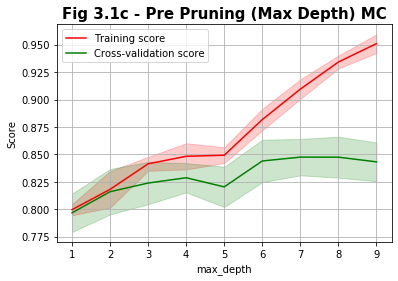

[(7, 0.8475028385954826),
 (8, 0.8474595253083279),
 (6, 0.8439718640777706),
 (9, 0.843186160011752),
 (4, 0.8287010828390793),
 (3, 0.8238645705804535),
 (5, 0.8203575504549985),
 (2, 0.8159828332375847),
 (1, 0.7967363978039481)]

In [157]:
plot_validation_curve(mod_dt, X_train, y_train, param_name = "max_depth", param_range = np.arange(1,10),
                     title = "Fig 3.1c - Pre Pruning (Max Depth) MC")

Train Score Mean 0.8323473908024219
Test Score Mean 0.829346908731025


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

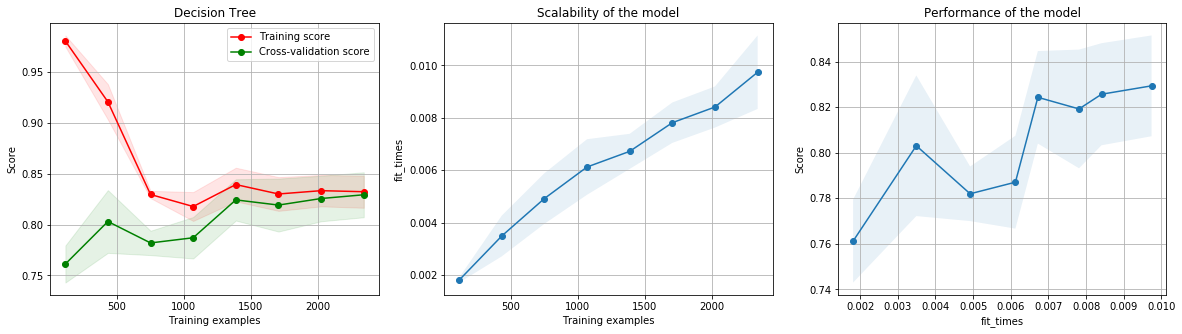

In [93]:
mod_dt = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.012, max_depth = 100 ,random_state =1)
plot_learning_curve(mod_dt, X_train, y_train, "Decision Tree")

Train Score Mean 0.8323473908024219
Test Score Mean 0.829346908731025


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

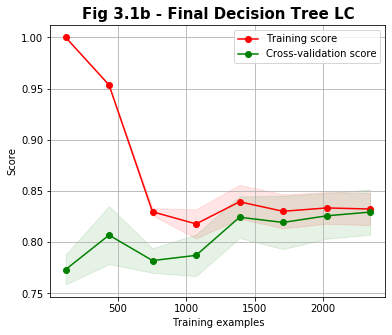

In [158]:
mod_dt = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.012, max_depth = 100 ,random_state =1)
plot_learning_curve(mod_dt, X_train, y_train, "Fig 3.1b - Final Decision Tree LC")

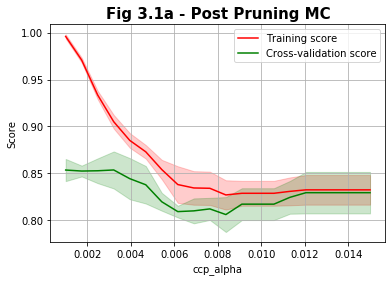

[(0.0032105263157894736, 0.8535730425707799),
 (0.001, 0.8534989646477925),
 (0.0024736842105263154, 0.8527168720760733),
 (0.0017368421052631577, 0.8524205619613674),
 (0.003947368421052632, 0.8443149097046577),
 (0.004684210526315789, 0.8377912614061598),
 (0.012052631578947367, 0.829346908731025),
 (0.012789473684210524, 0.829346908731025),
 (0.013526315789473681, 0.829346908731025),
 (0.014263157894736842, 0.829346908731025),
 (0.015, 0.829346908731025),
 (0.01131578947368421, 0.8243936185144148),
 (0.005421052631578947, 0.8196466362404482),
 (0.009105263157894734, 0.8171235319333835),
 (0.009842105263157895, 0.8171235319333835),
 (0.010578947368421052, 0.8171235319333835),
 (0.007631578947368421, 0.8120668021164326),
 (0.0068947368421052625, 0.8099643344729512),
 (0.006157894736842104, 0.8091707969263539),
 (0.008368421052631577, 0.8060249353985528)]

In [159]:
mod_dt = DecisionTreeClassifier(random_state =1, criterion = 'entropy', max_depth =18)
plot_validation_curve(mod_dt, X_train_scaled, y_train, param_name = "ccp_alpha", param_range = np.linspace(0.001, 0.015, 20)
                     ,title = "Fig 3.1a - Post Pruning MC")

The balanced accuracy of the Decision Tree is 0.789
              precision    recall  f1-score   support

           0       0.81      0.88      0.85       440
           1       0.80      0.70      0.74       293

    accuracy                           0.81       733
   macro avg       0.81      0.79      0.79       733
weighted avg       0.81      0.81      0.81       733

Train Score Mean 0.8323473908024219
Test Score Mean 0.829346908731025


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

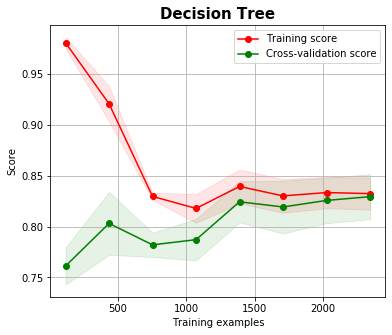

In [207]:
final_dt = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.012, max_depth = 5 ,random_state =1)
final_dt.fit(X_train_scaled, y_train)
prediction=final_dt.predict(X_test)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(final_dt, X_train, y_train, "Decision Tree")

# Boosting

In [20]:
from sklearn.model_selection import cross_val_score
from sklearn.datasets import load_iris
from sklearn.ensemble import AdaBoostClassifier

Train Score Mean 0.7996115467314148
Test Score Mean 0.7967363978039481


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

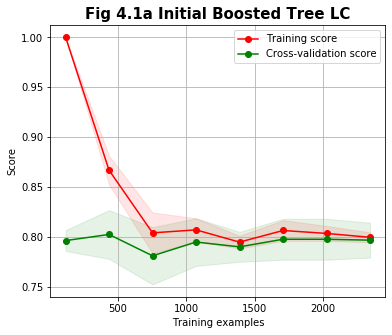

In [163]:
mod_dt = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.09 ,random_state =1)
boosted_mod_dt = AdaBoostClassifier(mod_dt, n_estimators = 10)
plot_learning_curve(boosted_mod_dt, X_train, y_train, "Fig 4.1a Initial Boosted Tree LC")

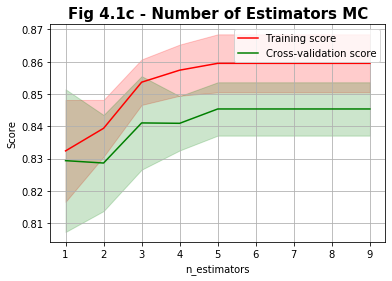

In [169]:
perf_array = plot_validation_curve(boosted_mod_dt, X_train, y_train, param_name = "n_estimators", param_range = np.arange(1,10),
                                  title = "Fig 4.1c - Number of Estimators MC")


Train Score Mean 0.8536356881047924
Test Score Mean 0.8410407724063225


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

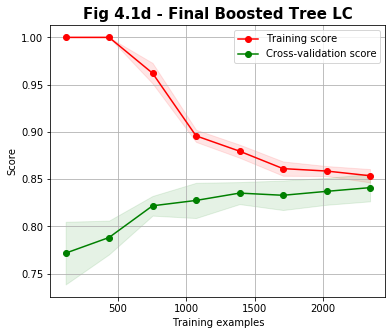

In [170]:
mod_dt = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.0155, max_depth =25 ,random_state =1)
boosted_mod_dt = AdaBoostClassifier(mod_dt, n_estimators = 3)
plot_learning_curve(boosted_mod_dt, X_train, y_train, "Fig 4.1d - Final Boosted Tree LC")

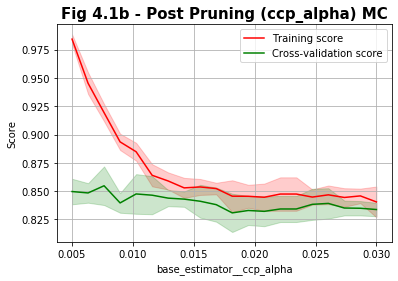

In [166]:
perf_array = plot_validation_curve(boosted_mod_dt, X_train, y_train, param_name = "base_estimator__ccp_alpha", param_range = np.linspace(0.005, 0.03, 20)
                                  , title ="Fig 4.1b - Post Pruning (ccp_alpha) MC")


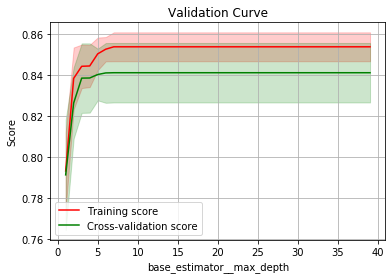

In [75]:
perf_array = plot_validation_curve(boosted_mod_dt, X_train, y_train, param_name = "base_estimator__max_depth", param_range = np.arange(1,40))


The balanced accuracy of the Decision Tree is 0.818
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       504
           1       0.70      0.79      0.74       229

    accuracy                           0.83       733
   macro avg       0.80      0.82      0.81       733
weighted avg       0.84      0.83      0.83       733

Train Score Mean 0.8536356881047924
Test Score Mean 0.8410407724063225


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

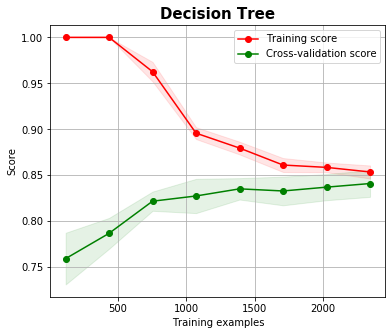

In [208]:
mod_dt = DecisionTreeClassifier(criterion = 'entropy', ccp_alpha = 0.0155, max_depth =25 ,random_state =1)
final_boosted_mod_dt = AdaBoostClassifier(mod_dt, n_estimators = 3)

final_boosted_mod_dt.fit(X_train, y_train)

prediction=final_boosted_mod_dt.predict(X_test)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(final_boosted_mod_dt, X_train, y_train, "Decision Tree")

# SVM

In [181]:
svc = svm.SVC(random_state = 1)
parameter_space = param_grid = {'C': [1, 0.1, 0.01,0.001, 0.0001],
                                'gamma': [1,0.1],
                                'kernel': ['rbf', 'linear']}
clf = GridSearchCV(svc, parameter_space, n_jobs=-1, cv=5, verbose = 3)
clf.fit(X_train_scaled, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best parameters found:
 {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.874 (+/-0.015) for {'C': 1, 'gamma': 1, 'kernel': 'rbf'}
0.846 (+/-0.023) for {'C': 1, 'gamma': 1, 'kernel': 'linear'}
0.885 (+/-0.011) for {'C': 1, 'gamma': 0.1, 'kernel': 'rbf'}
0.846 (+/-0.023) for {'C': 1, 'gamma': 0.1, 'kernel': 'linear'}
0.714 (+/-0.008) for {'C': 0.1, 'gamma': 1, 'kernel': 'rbf'}
0.848 (+/-0.016) for {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.858 (+/-0.015) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'rbf'}
0.848 (+/-0.016) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
0.651 (+/-0.001) for {'C': 0.01, 'gamma': 1, 'kernel': 'rbf'}
0.846 (+/-0.013) for {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}
0.780 (+/-0.007) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'rbf'}
0.846 (+/-0.013) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}
0.651 (+/-0.001) for {'C': 0.001, 'gamma': 1, 'kernel': 'rbf'}
0.827 (+/-0.027) for {'C': 0.001, 'gamma': 1, 'kernel

Train Score Mean 0.8931806148922314
Test Score Mean 0.8695480820546173


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

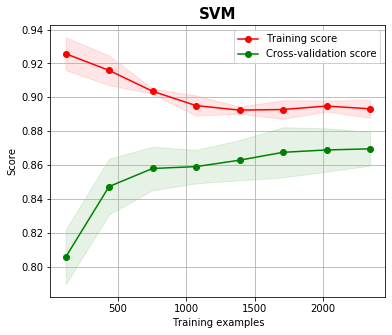

In [182]:
svc = svm.SVC(random_state = 1)
svc.set_params(**clf.best_params_)
plot_learning_curve(svc, X_train_scaled, y_train, "SVM")

## SVM RBF

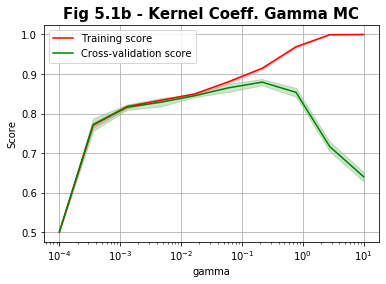

[(0.0001, 0.5),
 (0.00035938136638046257, 0.7717405498000283),
 (0.001291549665014884, 0.8158026132053525),
 (0.004641588833612782, 0.8284866219253824),
 (0.016681005372000592, 0.8448929510740706),
 (0.05994842503189409, 0.8649174661765461),
 (0.21544346900318845, 0.8793571637739322),
 (0.7742636826811278, 0.8535370489769928),
 (2.782559402207126, 0.7161395281836438),
 (10.0, 0.6400597800095648)]

In [184]:
plot_validation_curve_log(svc, X_train_scaled, y_train, param_name = "gamma", param_range = np.logspace(-4,1,10),
                         title = "Fig 5.1b - Kernel Coeff. Gamma MC")

Train Score Mean 0.828076501242791
Test Score Mean 0.8254430419065629


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

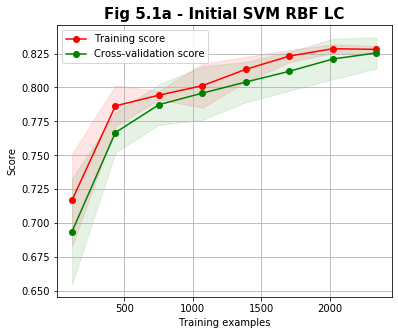

In [179]:
svc = svm.SVC(random_state = 1, gamma = 0.1, kernel = 'rbf', C = 0.1)
plot_learning_curve(svc, X_train_scaled, y_train, "Fig 5.1a - Initial SVM RBF LC")

Train Score Mean 0.8588081038055002
Test Score Mean 0.8531520253970972


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

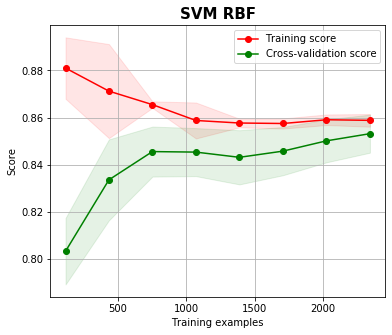

In [188]:
svc = svm.SVC(random_state = 1, gamma = 0.0167, kernel = 'rbf', C = 2.15)
plot_learning_curve(svc, X_train_scaled, y_train, "SVM RBF")

In [102]:
svc.fit(X_train_scaled, y_train)
prediction=svc.predict(X_test_scaled)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))
print(classification_report(prediction,y_test))


The balanced accuracy of the Decision Tree is 0.836
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       515
           1       0.70      0.82      0.76       218

    accuracy                           0.84       733
   macro avg       0.81      0.84      0.82       733
weighted avg       0.85      0.84      0.85       733



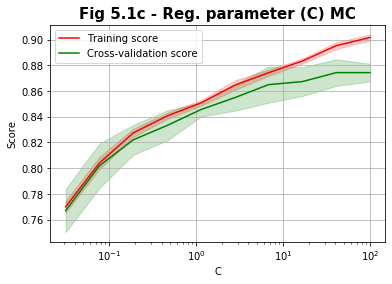

[(0.03162277660168379, 0.7671426109660605),
 (0.0774263682681127, 0.8019816369572069),
 (0.1895735652406376, 0.8220774816351138),
 (0.464158883361278, 0.8332348034962056),
 (1.1364636663857248, 0.8455768248214506),
 (2.7825594022071245, 0.8548510296061108),
 (6.812920690579615, 0.8649670782859309),
 (16.68100537200059, 0.8673381607249817),
 (40.842386526745216, 0.8743066643662564),
 (100.0, 0.8743069943059719)]

In [189]:
plot_validation_curve_log(svc, X_train_scaled, y_train, param_name = "C", param_range = np.logspace(-1.5,2,10),
                         title = "Fig 5.1c - Reg. parameter (C) MC")

The balanced accuracy of the Decision Tree is 0.836
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       515
           1       0.70      0.82      0.76       218

    accuracy                           0.84       733
   macro avg       0.81      0.84      0.82       733
weighted avg       0.85      0.84      0.85       733

Train Score Mean 0.8588081038055002
Test Score Mean 0.8531520253970972


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

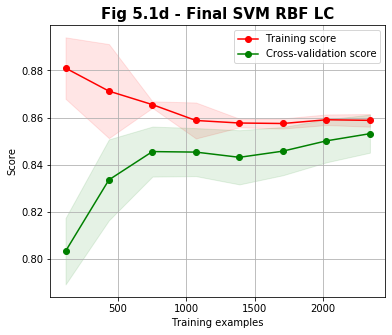

In [210]:
svc_rbf = svm.SVC(random_state = 1, gamma = 0.0167, kernel = 'rbf', C = 2.15)

svc_rbf.fit(X_train, y_train)

prediction=svc_rbf.predict(X_test)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(svc_rbf, X_train, y_train, "Fig 5.1d - Final SVM RBF LC")

## SVM Linear

In [105]:
svc = svm.SVC(random_state = 1)
parameter_space = param_grid = {'C': [0.1, 0.01,0.001, 0.0001],
                                'gamma': [1,0.1,0.5],
                                'kernel': ['linear']}
clf = GridSearchCV(svc, parameter_space, n_jobs=-1, cv=5, verbose = 3)
clf.fit(X_train_scaled, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:
 {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.848 (+/-0.016) for {'C': 0.1, 'gamma': 1, 'kernel': 'linear'}
0.848 (+/-0.016) for {'C': 0.1, 'gamma': 0.1, 'kernel': 'linear'}
0.848 (+/-0.016) for {'C': 0.1, 'gamma': 0.5, 'kernel': 'linear'}
0.846 (+/-0.013) for {'C': 0.01, 'gamma': 1, 'kernel': 'linear'}
0.846 (+/-0.013) for {'C': 0.01, 'gamma': 0.1, 'kernel': 'linear'}
0.846 (+/-0.013) for {'C': 0.01, 'gamma': 0.5, 'kernel': 'linear'}
0.827 (+/-0.027) for {'C': 0.001, 'gamma': 1, 'kernel': 'linear'}
0.827 (+/-0.027) for {'C': 0.001, 'gamma': 0.1, 'kernel': 'linear'}
0.827 (+/-0.027) for {'C': 0.001, 'gamma': 0.5, 'kernel': 'linear'}
0.651 (+/-0.001) for {'C': 0.0001, 'gamma': 1, 'kernel': 'linear'}
0.651 (+/-0.001) for {'C': 0.0001, 'gamma': 0.1, 'kernel': 'linear'}
0.651 (+/-0.001) for {'C': 0.0001, 'gamma': 0.5, 'kernel': 'linear'}


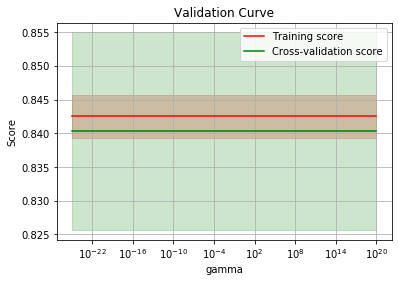

[(1e-25, 0.8402843647591893),
 (1e-20, 0.8402843647591893),
 (1e-15, 0.8402843647591893),
 (1e-10, 0.8402843647591893),
 (1e-05, 0.8402843647591893),
 (1.0, 0.8402843647591893),
 (100000.0, 0.8402843647591893),
 (10000000000.0, 0.8402843647591893),
 (1000000000000000.0, 0.8402843647591893),
 (1e+20, 0.8402843647591893)]

In [111]:
plot_validation_curve_log(svc, X_train_scaled, y_train, param_name = "gamma", param_range = np.logspace(-25,20,10))

Train Score Mean 0.8424980642665656
Test Score Mean 0.8402843647591893


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

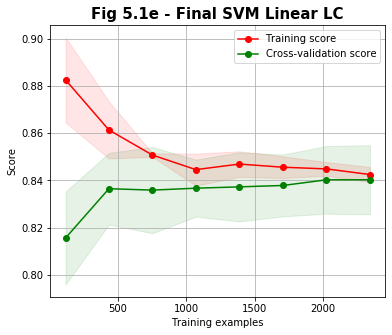

In [193]:
svc = svm.SVC(random_state = 1, gamma = 1, kernel = 'linear', C = 0.046, class_weight = "balanced")
plot_learning_curve(svc, X_train_scaled, y_train, "Fig 5.1e - Final SVM Linear LC")

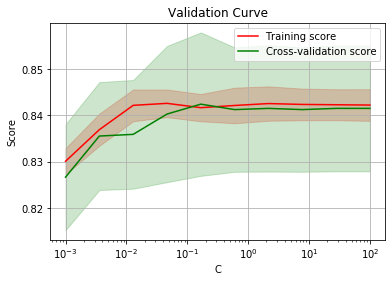

[(0.001, 0.8266950588318889),
 (0.003593813663804626, 0.8355502482611528),
 (0.01291549665014884, 0.8359124779060163),
 (0.046415888336127795, 0.8402843647591893),
 (0.1668100537200059, 0.842418483449595),
 (0.5994842503189409, 0.8412444136237835),
 (2.1544346900318843, 0.8415061937284957),
 (7.742636826811277, 0.8412444136237835),
 (27.825594022071257, 0.8415068808153846),
 (100.0, 0.8415068808153846)]

In [115]:
plot_validation_curve_log(svc, X_train_scaled, y_train, param_name = "C", param_range = np.logspace(-3,2,10))

The balanced accuracy of the Decision Tree is 0.790
              precision    recall  f1-score   support

           0       0.83      0.87      0.85       453
           1       0.77      0.71      0.74       280

    accuracy                           0.81       733
   macro avg       0.80      0.79      0.79       733
weighted avg       0.81      0.81      0.81       733

Train Score Mean 0.8424980642665656
Test Score Mean 0.8402843647591893


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

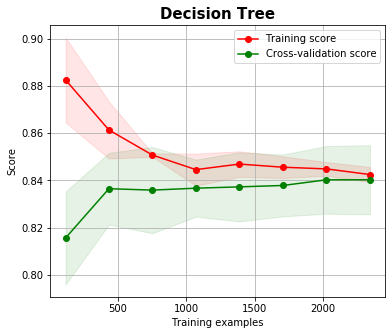

In [209]:
svc_linear = svm.SVC(random_state = 1, gamma = 1, kernel = 'linear', C = 0.046, class_weight = "balanced")

svc_linear.fit(X_train, y_train)

prediction=svc_linear.predict(X_test)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(svc_linear, X_train, y_train, "Decision Tree")

# KNN

In [196]:
knn = KNeighborsClassifier()
parameter_space = {'n_neighbors':[5,10,25,50,],
              'leaf_size':[1,3,5, 10],
              'algorithm':['ball_tree', 'kd_tree', 'brute'],
                   'weights' :['uniform' , 'distance'],
                   'p' : [1,2]
              }
clf = GridSearchCV(knn, parameter_space, n_jobs=-1, cv=5, verbose = 3)
clf.fit(X_train_scaled, y_train)
# Best paramete set
print('Best parameters found:\n', clf.best_params_)

# All results
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std * 2, params))

Fitting 5 folds for each of 192 candidates, totalling 960 fits
Best parameters found:
 {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 25, 'p': 1, 'weights': 'distance'}
0.864 (+/-0.004) for {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
0.887 (+/-0.016) for {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 5, 'p': 1, 'weights': 'distance'}
0.860 (+/-0.012) for {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'uniform'}
0.882 (+/-0.010) for {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 5, 'p': 2, 'weights': 'distance'}
0.865 (+/-0.014) for {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 10, 'p': 1, 'weights': 'uniform'}
0.891 (+/-0.014) for {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 10, 'p': 1, 'weights': 'distance'}
0.864 (+/-0.013) for {'algorithm': 'ball_tree', 'leaf_size': 1, 'n_neighbors': 10, 'p': 2, 'weights': 'uniform'}
0.889 (+/-0.013) for {'algorit

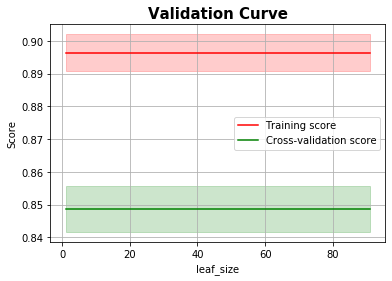

[(1, 0.848613251841871),
 (11, 0.848613251841871),
 (21, 0.848613251841871),
 (31, 0.848613251841871),
 (41, 0.848613251841871),
 (51, 0.848613251841871),
 (61, 0.848613251841871),
 (71, 0.848613251841871),
 (81, 0.848613251841871),
 (91, 0.848613251841871)]

In [197]:
plot_validation_curve(knn, X_train_scaled, y_train, param_name = "leaf_size", param_range = np.arange(1,100,10))


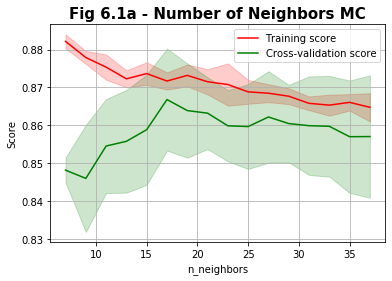

[(17, 0.8668102969069045),
 (19, 0.8639055628545804),
 (21, 0.8632172366461509),
 (27, 0.8622116709860478),
 (29, 0.8604745202452765),
 (31, 0.8599165516707972),
 (23, 0.8598828576000889),
 (33, 0.8597562381328412),
 (25, 0.8596908840446339),
 (15, 0.8588673699912819),
 (37, 0.857049964150231),
 (35, 0.8570111305315843),
 (13, 0.8557968323105991),
 (11, 0.8545519117014683),
 (7, 0.8481945936336481),
 (9, 0.8460115227132887)]

In [198]:
plot_validation_curve(knn, X_train_scaled, y_train, param_name = "n_neighbors", param_range = np.arange(7,39,2)
                     , title = "Fig 6.1a - Number of Neighbors MC")



Train Score Mean 0.8716689506208507
Test Score Mean 0.8668102969069045


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

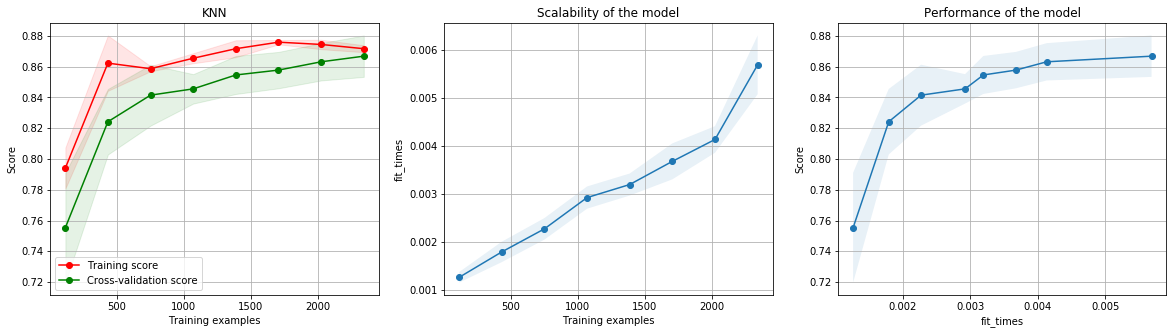

In [125]:
knn = KNeighborsClassifier(algorithm = 'auto', p=2, leaf_size= 1, n_neighbors = 17)
plot_learning_curve(knn, X_train_scaled, y_train, "KNN")

Train Score Mean 0.8690732122258098
Test Score Mean 0.8614393243031782


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

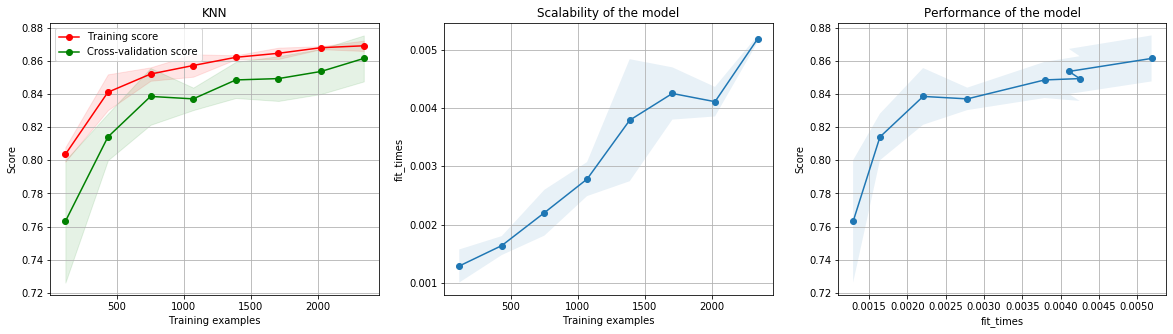

In [127]:
knn = KNeighborsClassifier(algorithm = 'auto', p=1, leaf_size= 1, n_neighbors = 20)
plot_learning_curve(knn, X_train_scaled, y_train, "KNN")

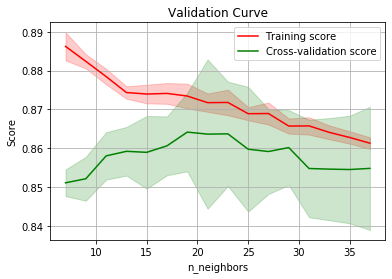

[(19, 0.8641673157518346),
 (23, 0.8637176574055438),
 (21, 0.8636474937091133),
 (17, 0.860635163722948),
 (29, 0.8601797059492873),
 (25, 0.8597627246471001),
 (13, 0.8592200142318663),
 (27, 0.859170732062197),
 (15, 0.85895856406687),
 (11, 0.8580425089716099),
 (37, 0.8548273997317934),
 (31, 0.8547943655405165),
 (33, 0.8546354261763387),
 (35, 0.8545325854358043),
 (9, 0.8521539516456835),
 (7, 0.8511129878013787)]

In [128]:
plot_validation_curve(knn, X_train_scaled, y_train, param_name = "n_neighbors", param_range = np.arange(7,39,2))


The balanced accuracy of the Decision Tree is 0.823
              precision    recall  f1-score   support

           0       0.88      0.87      0.88       479
           1       0.77      0.77      0.77       254

    accuracy                           0.84       733
   macro avg       0.82      0.82      0.82       733
weighted avg       0.84      0.84      0.84       733

Train Score Mean 0.8716689506208507
Test Score Mean 0.8668102969069045


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

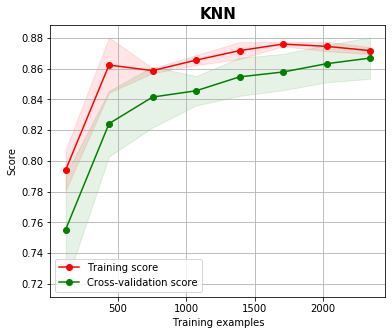

In [211]:
knn_final = KNeighborsClassifier(algorithm = 'auto', p=2, leaf_size= 1, n_neighbors = 17)
knn_final.fit(X_train_scaled, y_train)
prediction=knn_final.predict(X_test_scaled)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(knn_final, X_train_scaled, y_train, "KNN")

# Neural Network

In [199]:
#Importing MLPClassifier
from sklearn.neural_network import MLPClassifier

Train Score Mean 0.8462391754223078
Test Score Mean 0.8399624085595294


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

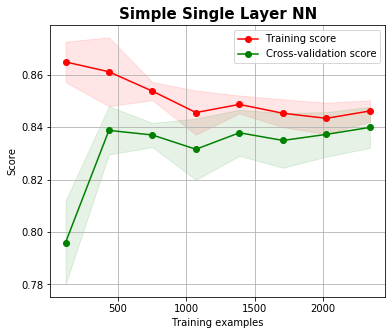

In [204]:
classifier = MLPClassifier(alpha = 0.001, hidden_layer_sizes=(4), max_iter=460,activation = 'relu',solver='adam',random_state=1)
plot_learning_curve(classifier, X_train_scaled, y_train, "Simple Single Layer NN")


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/u

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (60) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (160) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (210) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/

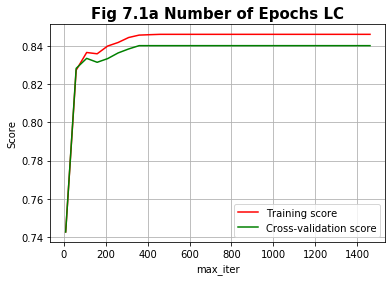

[(360, 0.840227266951513),
 (410, 0.8402248757511304),
 (460, 0.8402248757511304),
 (510, 0.8402248757511304),
 (560, 0.8402248757511304),
 (610, 0.8402248757511304),
 (660, 0.8402248757511304),
 (710, 0.8402248757511304),
 (760, 0.8402248757511304),
 (810, 0.8402248757511304),
 (860, 0.8402248757511304),
 (910, 0.8402248757511304),
 (960, 0.8402248757511304),
 (1010, 0.8402248757511304),
 (1060, 0.8402248757511304),
 (1110, 0.8402248757511304),
 (1160, 0.8402248757511304),
 (1210, 0.8402248757511304),
 (1260, 0.8402248757511304),
 (1310, 0.8402248757511304),
 (1360, 0.8402248757511304),
 (1410, 0.8402248757511304),
 (1460, 0.8402248757511304),
 (310, 0.8384942115246178),
 (260, 0.8364157126657441),
 (110, 0.8335705332742576),
 (210, 0.8334374066900023),
 (160, 0.8315127348548257),
 (60, 0.8283176117601043),
 (10, 0.7426468449098209)]

In [202]:
plot_validation_curve_nn(classifier, X_train, y_train, param_name = "max_iter", param_range = np.arange(10, 1500, 50), title = "Fig 7.1a Number of Epochs LC")


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


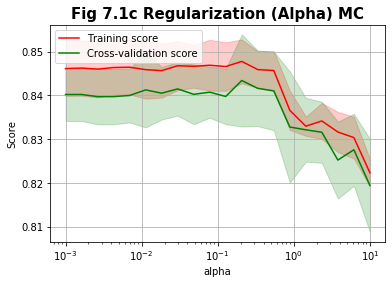

[(0.001, 0.8402248757511304),
 (0.001623776739188721, 0.8402248757511304),
 (0.0026366508987303583, 0.8397346796726991),
 (0.004281332398719396, 0.8397346796726991),
 (0.0069519279617756054, 0.839996459777411),
 (0.011288378916846888, 0.8412740574306456),
 (0.018329807108324356, 0.8405213941606131),
 (0.029763514416313176, 0.8415017863174759),
 (0.04832930238571752, 0.8402589269690122),
 (0.07847599703514611, 0.840751514247826),
 (0.12742749857031335, 0.8397680438036919),
 (0.20691380811147903, 0.8434295364399244),
 (0.3359818286283781, 0.841626674463772),
 (0.5455594781168515, 0.8410336376448064),
 (0.8858667904100823, 0.8327776144015935),
 (1.438449888287663, 0.832144396997661),
 (2.3357214690901213, 0.831580628995812),
 (3.792690190732246, 0.8252217400916105),
 (6.158482110660261, 0.8275784753283659),
 (10.0, 0.8194076500707681)]

In [205]:
plot_validation_curve_log(classifier, X_train_scaled, y_train, param_name = "alpha", param_range = np.logspace(-3,1,20), title = "Fig 7.1c Regularization (Alpha) MC")


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (460) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


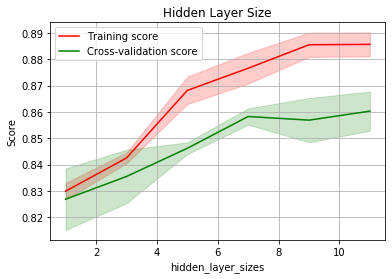

In [151]:
 plot_validation_curve(classifier, X_train_scaled, y_train, param_name = "hidden_layer_sizes", param_range = np.arange(1,12,2), title = "Hidden Layer Size")


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


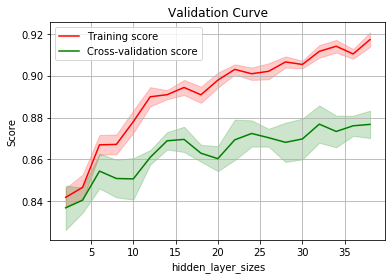

[(32, 0.8768305295949419),
 (38, 0.8767194982266553),
 (36, 0.8760379884722),
 (34, 0.8733334186030837),
 (24, 0.872372730461807),
 (26, 0.8703469219995895),
 (30, 0.8697503074984919),
 (16, 0.8695419254800741),
 (22, 0.8693341827383387),
 (14, 0.8688763337642955),
 (28, 0.8681340918378277),
 (18, 0.8629361302757751),
 (12, 0.8609619951836096),
 (20, 0.8603289110567897),
 (6, 0.8543940643815595),
 (8, 0.8508452800196494),
 (10, 0.8506669937870587),
 (4, 0.8405213941606131),
 (2, 0.8368303027675486)]

In [156]:
mod_nn = MLPClassifier(alpha = 0.03, max_iter = 500, activation = 'relu',solver='adam',random_state=1)

plot_validation_curve(mod_nn, X_train_scaled, y_train, param_name = "hidden_layer_sizes", param_range = np.arange(2,40,2))

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


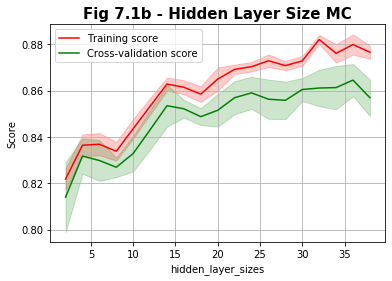

[(36, 0.8645477057833612),
 (34, 0.861317871591327),
 (32, 0.8611344458107977),
 (30, 0.8604991671461981),
 (24, 0.8590388514020724),
 (22, 0.8569628925959772),
 (38, 0.856944610564376),
 (26, 0.8563099917792074),
 (28, 0.8558256223356038),
 (14, 0.8534951048361513),
 (16, 0.8521665208997538),
 (20, 0.8515322592617588),
 (18, 0.8487736248222078),
 (12, 0.8431069969557416),
 (10, 0.8328943119201375),
 (4, 0.8317717666119815),
 (6, 0.8298699987246012),
 (8, 0.8269489688836782),
 (2, 0.8140516262893204)]

In [203]:
mod_nn = MLPClassifier(max_iter = 100, activation = 'relu',solver='adam',random_state=1)

plot_validation_curve(mod_nn, X_train_scaled, y_train, param_name = "hidden_layer_sizes", param_range = np.arange(2,40,2) ,
                     title = "Fig 7.1b - Hidden Layer Size MC")


Train Score Mean 0.8780270880730059
Test Score Mean 0.8623990704355148


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

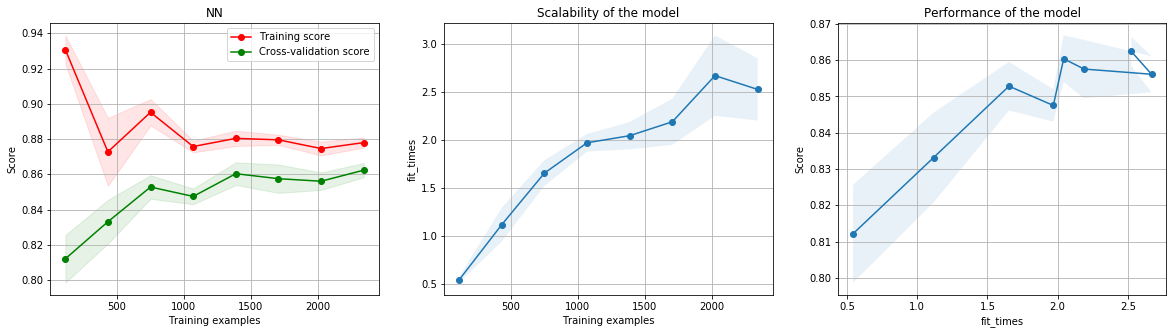

In [158]:

classifier = MLPClassifier(alpha = .7, hidden_layer_sizes=(16), max_iter=800,activation = 'relu',solver='adam',random_state=1)
plot_learning_curve(classifier, X_train_scaled, y_train, "NN")

Train Score Mean 0.8989444026479887
Test Score Mean 0.8650248810230682


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

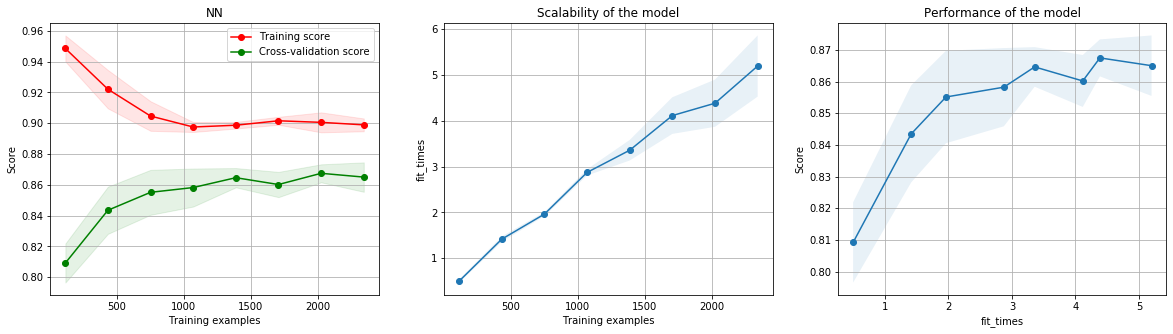

In [148]:
classifier = MLPClassifier(alpha = .01, hidden_layer_sizes=(10, 10), max_iter=500,activation = 'relu',solver='adam',random_state=1)
plot_learning_curve(classifier, X_train_scaled, y_train, "NN")

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (110) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (210) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (310) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/

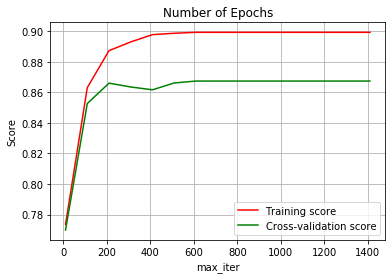

[(610, 0.867370272327135),
 (710, 0.867370272327135),
 (810, 0.867370272327135),
 (910, 0.867370272327135),
 (1010, 0.867370272327135),
 (1110, 0.867370272327135),
 (1210, 0.867370272327135),
 (1310, 0.867370272327135),
 (1410, 0.867370272327135),
 (510, 0.8661281000655598),
 (210, 0.8660097256409806),
 (310, 0.8634872073786152),
 (410, 0.8616479029841987),
 (110, 0.8526419648185094),
 (10, 0.7698814046626918)]

In [145]:
plot_validation_curve_nn(classifier, X_train, y_train, param_name = "max_iter", param_range = np.arange(10, 1500, 100), title = "Number of Epochs")


## Final NN

The balanced accuracy of the Decision Tree is 0.849
              precision    recall  f1-score   support

           0       0.93      0.85      0.89       520
           1       0.70      0.85      0.77       213

    accuracy                           0.85       733
   macro avg       0.82      0.85      0.83       733
weighted avg       0.86      0.85      0.85       733

Train Score Mean 0.8469739125157707
Test Score Mean 0.8407491230474434


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

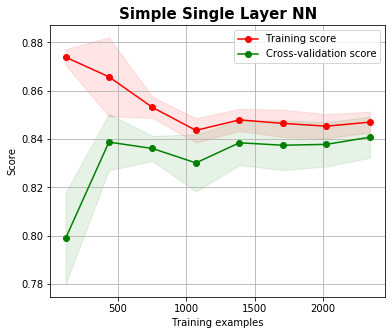

In [212]:

final_nn = MLPClassifier(alpha = 0.03, hidden_layer_sizes=(4), max_iter=500,activation = 'relu',solver='adam',random_state=1)

final_nn.fit(X_train_scaled, y_train)
prediction=final_nn.predict(X_test_scaled)
print('The balanced accuracy of the Decision Tree is',"{:.3f}".format(metrics.balanced_accuracy_score(prediction,y_test)))
print(classification_report(prediction,y_test))
plot_learning_curve(final_nn, X_train_scaled, y_train, "Simple Single Layer NN")

# Timing

In [213]:
estimators = [(final_dt, "Decision Tree"),
 (final_boosted_mod_dt, "Boosted Tree"),
(svc_rbf, "SVM RBF"),
(svc_linear, "SVM Linear"),
(knn_final, "KNN"),
(final_nn, "Neural Net")]

Decision Tree
Boosted Tree
SVM RBF
SVM Linear
KNN
Neural Net


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:617: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/site-packages/matplotlib/pyplot.py'>

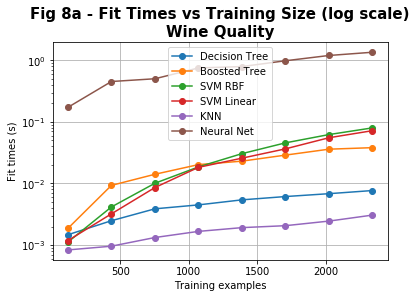

In [220]:
plot_timing_curves(estimators
, X_train_scaled, y_train, "Fig 8a - Fit Times vs Training Size (log scale)\nWine Quality")

In [218]:
import time

test_times = []
for estimator, name in estimators:
    start_time1 = time.time()
    estimator.fit(X_train_scaled, y_train)
    end_time1 = time.time()
    start_time2 = time.time()
    estimator.predict(X_test)
    end_time2 = time.time()
    test_times.append((name, (end_time1-start_time1),end_time2-start_time2))
    
test_times

[('Decision Tree', 0.011196136474609375, 0.0003998279571533203),
 ('Boosted Tree', 0.06762814521789551, 0.0011448860168457031),
 ('SVM RBF', 0.14478468894958496, 0.06869387626647949),
 ('SVM Linear', 0.12219119071960449, 0.016433238983154297),
 ('KNN', 0.0035829544067382812, 0.14430594444274902),
 ('Neural Net', 1.4688079357147217, 0.00015473365783691406)]